In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tp.head(30)
tp.shape

(359388, 141)

In [4]:
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [5]:
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

In [105]:
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','created_in','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width','time', 'ideal_glass','table_origin','td_id', 'fermentation','origin_score',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume','source_system',
       'abv', 'units_per_sku','length','creation_brand', 'country_of_origin','height','business_name',
       'is_active','identification_number','source','title','td_id','system','currency',
       'identification_number_unify', 'is_employee','last_name','product_spk','business_spk',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id','department','item_id', 'uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local','td_id.1','customer_first_order_period','customer_first_order_year',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code','unit_tax_usd','unit_tax_local',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema','is_abi','time.1','product_nk'], axis = 1)

In [106]:
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
s

In [107]:
tp_arg = tpf1.loc[tpf1['country'] == 'Argentina']

In [112]:
tp_f = tp_arg.dropna(1, how= 'all' )
tp_f.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           1166
date_created                     979
name                               0
category                        3600
s

In [120]:
##Cambio todos los brands de importadas por 'importadas'
tp_f.brand = tp_f.brand.replace(to_replace = ['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'],value = 'importada')


In [131]:
tp_f.brand = tp_f.brand.replace(to_replace = ['Grupo Modelo'],value = 'Corona')

In [148]:
tp_f.head(50)
tp_f['rate_local_do_usd'].unique()

array([0.0509, 0.0638, 0.0603, 0.0497, 0.0361, 0.0354])

In [144]:
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
s

In [133]:
tp_f.shape

(127514, 28)

In [134]:
## Algunos comentarios: 
##   No hay info de 2019, termina en 18 Agosto 2018
##   id podriamos usarlo para saber cuanto gasta una persona en promedio en ecommerce, ver evolucion
##   Bevybar y Craft Society son cosas sin marca, habria que unirlas

cant_NaNf = tp_f.isnull().sum()
print(cant_NaNf,'\r\n')

country                           0
id                                0
unit_discount_usd                 0
customer_first_order_date         0
unit_gross_revenue_local          0
unit_delivery_charged_usd         0
unit_net_revenue_usd              0
order_date                        0
order_status                      0
order_status_type                 0
customer_spk                      0
unit_price_charged_local          0
unit_gross_revenue_usd            0
source_system_order_id            0
unit_delivery_charged_local       0
rate_local_do_usd                 0
quantity                          0
unit_price_charged_usd            0
unit_net_revenue_local            0
order_days_after_first_order      0
order_time                        0
row_created_at                    0
sku                              14
brand                           187
date_created                      0
name                              0
category                          0
subcategory                 

In [135]:
##Tabla para ver cuantas veces compró cada usuario
compras_usuario = tp_f.groupby(['id'])['id'].count()
compras_usuario = compras_usuario.loc[compras_usuario < 10]
compras_usuario.describe

<bound method NDFrame.describe of id
["ar_bevybar;00005c5b185e25f9c7b9642ca76950fe43e4fcce6c02cbbf7a8768f2dd1ed395"]    3
["ar_bevybar;00010fe97133694cb929e412dba2d425dfa510e6193b75c2d314e32720c2abbf"]    4
["ar_bevybar;0004e1e6b290d864e2776edc0ddd5ad41eb651a793dfaaa8a0053d25bcc3b741"]    2
["ar_bevybar;0005c424ba71c03ac51d8a08844d281966d94b9cd2c5392c1d5b502c83c752ab"]    3
["ar_bevybar;00078c1eb18da02b9da6835c16bdf960a37fb1fa830f0a5c75145bcab5107721"]    4
["ar_bevybar;0008677f0ecc3a797ce5941630f876d9fcee2bc34b59b7b3bbc79ae19b0e2b76"]    1
["ar_bevybar;000a451eba39ef9e3dca6a960bf3bf01b79183e5115c53d5f5509d4fa0e3bf0c"]    2
["ar_bevybar;000a79e8f3fbccdb6ce37315cbbb5d2baeed8e38a1468ad67cfb43c74a79304c"]    1
["ar_bevybar;000e1fc55ebe0cdfb84cc02b15cffa8fa15d55433eac1e7906f12b0e040e20da"]    1
["ar_bevybar;000e8d3fcdd026d84901038b522daa7dfbee79d49364e087dfc1f604bdded74a"]    3
["ar_bevybar;000f7bbac8973c84e0d72f6ef1e056937ab2d0e2277d3e94ebd9ee15800dd503"]    1
["ar_bevybar;0010f3d163a9992

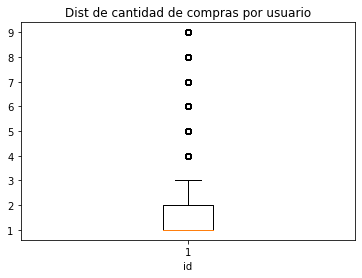

In [136]:
plt.boxplot(compras_usuario)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()

In [137]:
tp_f['brand'].unique()

array(['Corona', 'Patagonia Brewing Co.', 'Stella Artois', 'importada',
       'BevyBar', 'Multimarca', 'Cervecería y Maltería Quilmes',
       'Craft Society', nan, 'Budweiser'], dtype=object)

In [138]:
tp_f.brand.value_counts()

importada                        42990
Stella Artois                    26774
Patagonia Brewing Co.            19487
BevyBar                          17754
Corona                           16837
Cervecería y Maltería Quilmes     1688
Multimarca                        1297
Budweiser                          300
Craft Society                      200
Name: brand, dtype: int64

In [139]:
tp_f.category.value_counts()

Mixed Pack     68524
Beer           44355
Merchandise    11067
unknown         3568
Name: category, dtype: int64

In [140]:
##Voy a buscar dejar un dataset solo con las marcas de cerveza, y con las importadas agrupadas
tp_f = tp_f.loc[tp_f['category'].isin(['Mixed Pack', 'Beer', 'Merchandise','unknown'])]
tp_f.shape

(127514, 28)

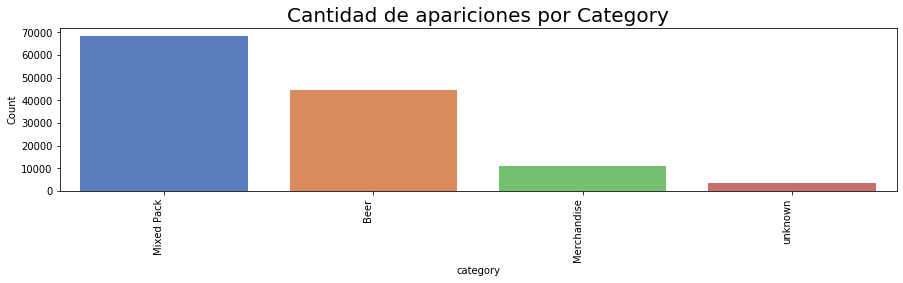

In [141]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= tp_f, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

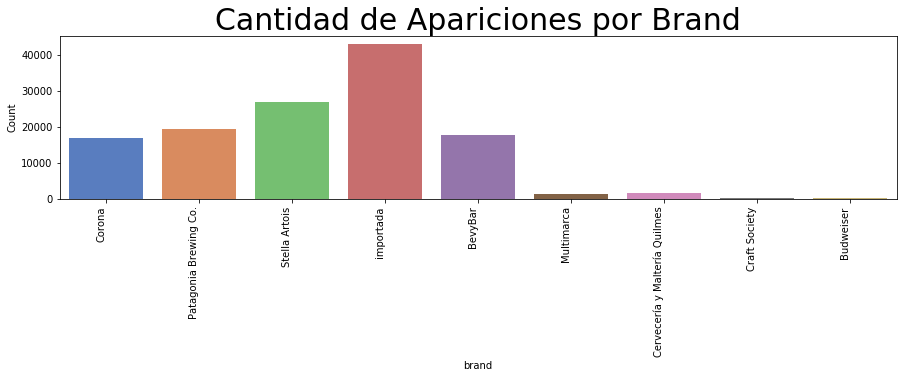

In [142]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_f, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [79]:
##tp_f.created_in.value_counts()

In [80]:
tp_f.order_status.value_counts()
##Borrar los grand_total_is_zero

paid                   114350
grand_total_is_zero      9952
pending                  1612
refunded                 1075
partially_refunded        509
authorized                 10
partially_paid              6
Name: order_status, dtype: int64

In [88]:
tp_f.brand.unique()

array(['Grupo Modelo', 'Patagonia Brewing Co.', 'Corona', 'Stella Artois',
       'importada', 'BevyBar', 'Multimarca',
       'Cervecería y Maltería Quilmes', 'Craft Society', nan, 'Budweiser'],
      dtype=object)

In [ ]:
##Ver si en alguna estacionalidad se vende mas el merchandising o alguna marca en particular
##Mostrar Cantidad de Ventas (Apariciones por brand) segun Beer, Merchandise y Mixed Pack
##Buscar si estan las columnas de lat y long y ver si podemos hacer un heatmap
##Separar fechas (por lo menos por mes) y analizar en que epoca se vende mas (verano?aguinaldo?)
##Todas las filas que tengan el order_status = grand_total_is_zero
##row_created_at
#order_status_type
#customer_spk